# Regression:
- Polynomial Regression
- Random Forest Regression
- k-NN Regression
- Bayesian Linear Regression

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

## 1.1 Polynomial Regression

## Goal: Make predictions of $\hat{y}$ for some $\hat{x}$. $x$ is our input data, $y$ is the output.
### Basically this will be done by learning the function that gets from $x \rightarrow y$

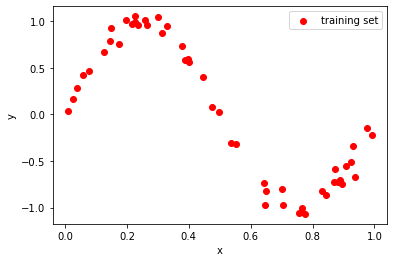

In [125]:
N = 50

#first, let's get the training data.
x = [random.uniform(0, 1) for i in range(N)]
y_raw = [np.sin(2*np.pi*i) for i in x] #the function! We know it, but let's pretend we don't and want to learn it.
noise = np.random.normal(0,0.1,N)
y = y_raw + noise

#test data
x_hat = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.scatter(x, y, marker = 'o', c = 'r', label = 'training set')
ax.legend()
ax.set_xlabel('x')
_=ax.set_ylabel('y')

### Let's say we want to fit this to a polynomial! Then the question that arises has to do with the degree of that polynomial. We think the function is of type $y(x) = w_1 x + w_2 x^2 + ... + w_n x^n$. As an example, let's use $n = 9$, and then circle back to this degree issue.

### This is an optimization problem, where we wish to minimize a loss function and find this vector $\vec{w}$. The loss function to be minimized must be the error between predictions and data.

### This optimization then means that the problem may be cast as $\vec{w} = (X^{T}X)^{-1} X^T Y$

### if of order n, then X must look like 
### [1 $x_1$ $x_1^2$ ... $x_1^n$
### 1 $x_2$ $x_2^2$ ... $x_2^n$
        ...
### 1 $x_N$ $x_N^2$ ... $x_N^n$]

In [126]:
n = 9
X = np.ones(N)
for j in range(1, n):
    pol = np.transpose(np.array([q**j for q in x]))
    X = np.append(X, pol, axis=0)
X = X.reshape(n, N).T

print(X.shape, X.T.shape, y.shape)

A = np.dot(X.T, X)
B = np.linalg.solve(A, np.identity(np.shape(A)[0]))
W = np.dot(np.dot(B, X.T), y)

(50, 9) (9, 50) (50,)


(100, 9) (9,)


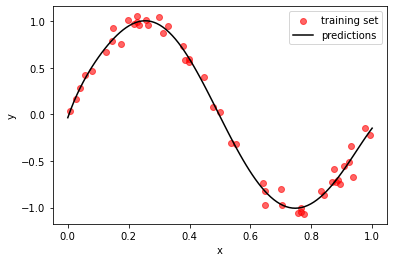

In [132]:
X = np.ones(len(x_hat))
for j in range(1, n):
    pol = np.transpose(np.array([q**j for q in x_hat]))
    X = np.append(X, pol, axis=0)
X = X.reshape(n, len(x_hat)).T
print(X.shape, W.shape)
y_hat = X.dot(W)

fig, ax = plt.subplots()
ax.scatter(x, y, marker = 'o', c = 'r', label = 'training set', alpha = 0.6)
ax.plot(x_hat, y_hat, 'k-', label = 'predictions')
ax.legend()
ax.set_xlabel('x')
_=ax.set_ylabel('y')

### Even though our generating function was a trig function, look how well fitted this data is to a 9th order polynomial! Of course, IRL no one ever ecnounters 9th order polynomials, but since polynomials are a complete and orthogonal set, they can mimic any nice function rather well 

## 1.1.1 RIDGE Regularization

### Regularization. Comes in handy to prevent overfitting by giving less important features of the data a penalty. The simplest example is Ridge Regression with a diagonal additive offset (to $X^T X$) when calculating the weights: $\vec{w} = (X^{T}X + \lambda I)^{-1} X^T Y$

In [139]:
def PolyRegRidge(x, y, x_hat, n, l):
    ''' x, y, x_hat, y_hat are xdata (train), ydata (train), xtest points
    n is the order of the polynomial
    l for RIDGE regularization'''
    X = np.ones(N)
    for j in range(1, n):
        pol = np.transpose(np.array([q**j for q in x]))
        X = np.append(X, pol, axis=0)
    X = X.reshape(n, N).T

    A = np.dot(X.T, X)
    A += l*np.identity(A.shape[0]) #RIDGE
    B = np.linalg.solve(A, np.identity(np.shape(A)[0]))
    W = np.dot(np.dot(B, X.T), y)

    X = np.ones(len(x_hat))
    for j in range(1, n):
        pol = np.transpose(np.array([q**j for q in x_hat]))
        X = np.append(X, pol, axis=0)
    X = X.reshape(n, len(x_hat)).T
    y_hat = X.dot(W)
    
    return y_hat

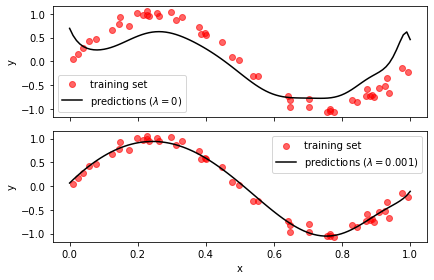

In [164]:
### Let's overfit by choosing a very high degree for the polynomial, and then compensate by using RIDGE regularization
fig, [ax0, ax1] = plt.subplots(2, sharex = True)
ax0.scatter(x, y, marker = 'o', c = 'r', label = 'training set', alpha = 0.6)
ax1.scatter(x, y, marker = 'o', c = 'r', label = 'training set', alpha = 0.6)
y_hat = PolyRegRidge(x, y, x_hat, n=23, l=0)
ax0.plot(x_hat, y_hat, 'k-', label = 'predictions ($\lambda = 0)$')
y_hat = PolyRegRidge(x, y, x_hat, n=23, l=0.001)
ax1.plot(x_hat, y_hat, 'k-', label = 'predictions ($\lambda = 0.001)$')
ax0.legend()
ax1.legend()
ax1.set_xlabel('x')
ax0.set_ylabel('y')
ax1.set_ylabel('y')
plt.tight_layout()

## 1.2 Random Forest Regression

### Google the word "regression" and you will find many types of regression: linear, logistic, polynomial, Bayesian (have to touch on that later), and then this thing called Random Forest Regression!

### It's basically a combination of two powerful tools: bootstrapping and decision tree regression

### 1.2.1 So first, decision tree regression. We'll use sklearn's built-in decision tree

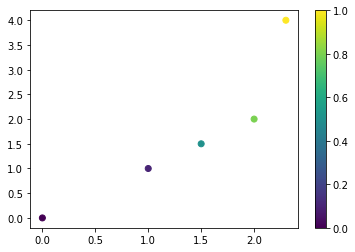

[0.5]


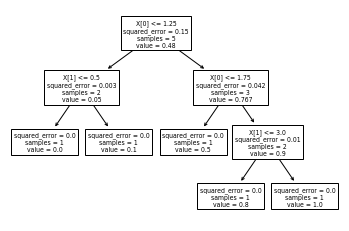

In [198]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()

#a dataset where there is a general increase as you go from left to right
X = [[0, 0], [2, 2], [1, 1], [1.5, 1.5], [2.3, 4]]
x, y = [i[0] for i in X], [i[1] for i in X]
t = [0., 0.8, 0.1, 0.5, 1.] #labels
fig, ax = plt.subplots()
p = ax.scatter(x, y, marker = 'o', c = t, cmap = 'viridis')
plt.colorbar(p)
plt.show()

clf = clf.fit(X, t)

print(clf.predict([[1.5, 3.1]]))
_=tree.plot_tree(clf)

### 1.2.2 Now we can proceed. First step is to bootstrap, i.e. choose random sample $k$ elements from a total of $n$. Do this $b$ times and compute whatever statistic you wish. In this case, we want to use a decision tree to make predictions. Then get average and variance of predictions.

In [262]:
#dataset
N = 100
x = [random.uniform(0, 1) for i in range(N)]
y_raw = [np.sin(2*np.pi*i) for i in x]
noise = np.random.normal(0,0.1,N)
y = y_raw + noise
X_test = np.linspace(0, 2, 200)

b = 10000
k = int(0.7*N)
clf = tree.DecisionTreeRegressor()
list_of_preds = []
for i in range(b):
    ind = random.choices(range(N), k=k)
    X_train = np.array([x[j] for j in ind])
    Y_train = np.array([y[j] for j in ind])
    clf = clf.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
    Y_hat = clf.predict(X_test.reshape(-1, 1))
    list_of_preds.append(Y_hat)

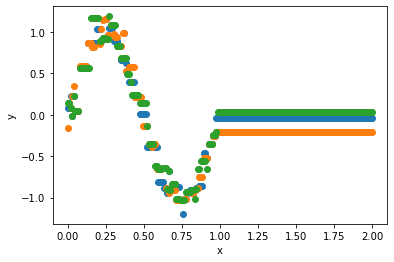

In [263]:
fig, ax = plt.subplots()
ax.scatter(X_test, list_of_preds[1])
ax.scatter(X_test, list_of_preds[20])
ax.scatter(X_test, list_of_preds[400])
ax.set_xlabel('x')
_=ax.set_ylabel('y')

### These are a few of the predictions. As you can see, this is a BAD method for extrapolation. Should never be used for that purpose. Also it does poorly whenever the function changes rapidly! 

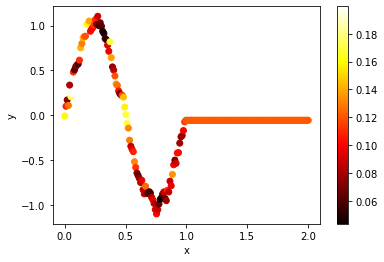

In [264]:
fig, ax = plt.subplots()
y_aves = []
y_std = []
for i in range(len(list_of_preds[0])):
    y = [pred
         [int(i)] for pred in list_of_preds]
    y_aves.append(np.mean(y))
    y_std.append(np.std(y))
p = ax.scatter(X_test, y_aves, facecolors='none', c=y_std, cmap = 'hot')
plt.colorbar(p)
ax.set_xlabel('x')
_=ax.set_ylabel('y')

### It does make the function "pointier"
### One of the advantages is runtime. It is blazingly fast, because a decision tree algorithm is done in log time. You can bootstrap many many times and keep getting more precise. 

## 1.3 k-NN Regression

### In k-NN, we wish to predict $y_i$ given some set of ${x,y}$. For that $y_i$, we compute its distance to all other points, and then select the distances to the $n$ nearest neighbors. The average of that is the prediction.
### As far as ''fitting'' algorithms go, kNN might win the prize for simplicity. And thus, it almost goes without saying that it isn't the best of choices in many instances!

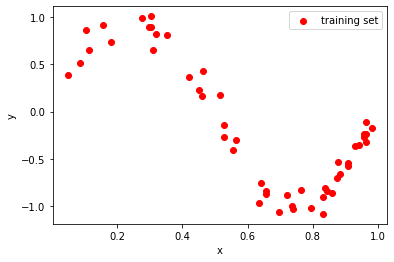

In [266]:
#Go back to our good-old sin function data
N = 50

#first, let's get the training data.
x = [random.uniform(0, 1) for i in range(N)]
y_raw = [np.sin(2*np.pi*i) for i in x] #the function! We know it, but let's pretend we don't and want to learn it.
noise = np.random.normal(0,0.1,N)
y = y_raw + noise

#test data
x_hat = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.scatter(x, y, marker = 'o', c = 'r', label = 'training set')
ax.legend()
ax.set_xlabel('x')
_=ax.set_ylabel('y')

#knn
def knn(x, y, x_hat, k):
    ''' x, y, x_hat, y_hat are xdata (train), ydata (train), xtest points
    k is the number of nearest neighbors'''
    x_h = x_hat.copy().tolist()
    x_nn, y_nn = [], []
    while len(x_h) > 0:
        x_i = random.choice(x_h)
        ind = x_h.index(x_i)
        x_h.pop(ind)
        dist = [abs(x_i-q) for q in x] #manhattan distance between selected point and x data points
        indsrt = np.argsort(dist, axis=-1, kind='quicksort', order=None)
        nn = [y[i] for i in indsrt[:k]]
        y_nn.append(np.mean(nn))
        x_nn.append(x_i)
    return x_nn, y_nn

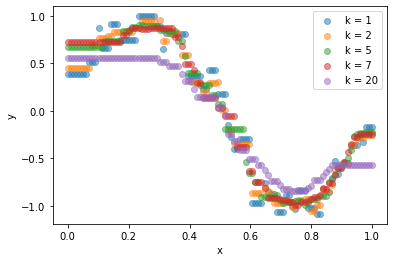

In [267]:
fig, ax = plt.subplots()
klist = [1, 2, 5, 7, 20]
for i in klist:
    x_nn, y_nn = knn(x, y, x_hat, i)
    ax.scatter(x_nn, y_nn, marker = 'o', alpha = 0.5, label = 'k = {}'.format(i))
    ax.legend()
    ax.set_xlabel('x')
    _=ax.set_ylabel('y')

## 1.4 Bayesian Linear Regression

### We start with Bayes' Theorem: $P(A|B)P(B) = P(B|A)P(A)$. In reality, B could be the data and A could be the weights/model. The likelihood is probability of data given weights. Let's denote it by $P(D|w)$. The posterior is the opposite of that: it is the probability of weights after having seen the data $P(w|D)$, and the prior is some probability distribution over the weights $P(w)$ (it might be informed by what we know about the system a priori). From Bayes, the posterior $P(w|D) \propto P(D|w)P(w)$ is the product of the prior and the likelihood.

### When the calculation of this posterior is computationally intractable, we might turn to sampling methods, namely Bayesian Linear Regression. We sample the posterior to obtain estimates for the posterior, and all that can allow us to obtain values for model parameters. 

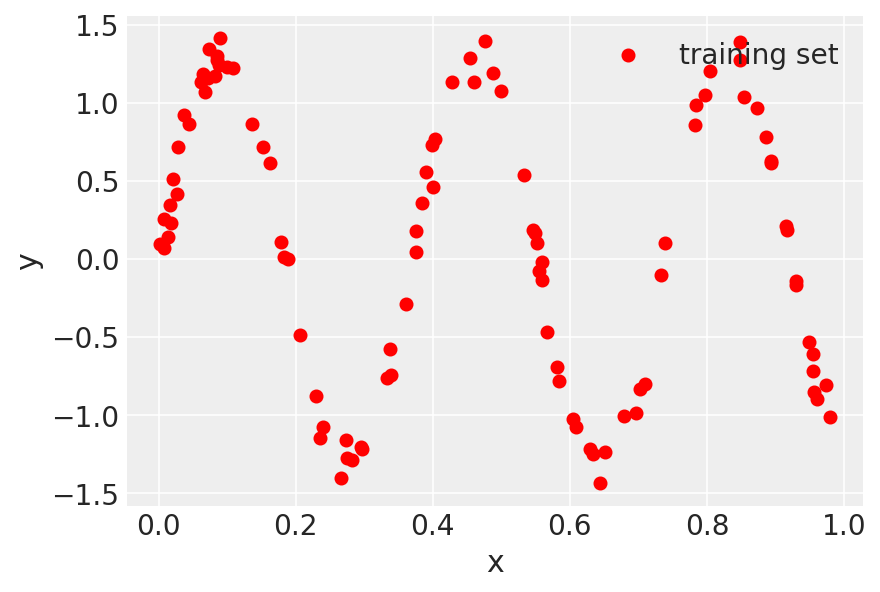

In [125]:
%matplotlib inline

N = 100
x = [random.uniform(0, 1) for i in range(N)]
y_raw = [1.3*np.sin(i*17) for i in x] #A*sin(omega*t): omega = 17, A = 1.3.
noise = np.random.normal(0,0.1,N)
y = y_raw + noise

fig, ax = plt.subplots()
ax.scatter(x, y, marker = 'o', c = 'r', label = 'training set')
ax.legend()
ax.set_xlabel('x')
_=ax.set_ylabel('y')

### We'll use the NYU EMCEE package. We'll put priors on $\omega$ and $b$, using top hat functions to say that we think the former lies somewhere between 0 and 20, and the latter is somewhere between -2 and 2.
### We'll write the likelihood function.

In [35]:
import emcee

In [133]:
def log_prior(theta):
    omega, A = theta
    if 0 < omega < 20 and 0 < A < 4:
        return 0.0
    return -np.inf

def log_likelihood(theta, x, y):
    omega, A = theta
    model = A*np.sin(omega*x)
    sigma_sq = model**2
    return -0.5 * np.sum((y-model)**2/sigma_sq + np.log(sigma_sq))

def log_probability(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

In [143]:
pos = np.array([2, 20])+ 1e-4  * np.random.randn(10, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y))
sampler.run_mcmc(pos, 5000, progress=True)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 2875.76it/s]


State([[ 2.00007403 19.99996234]
 [ 2.00019178 19.99996974]
 [ 2.00001248 20.00005732]
 [ 2.00021915 19.99984844]
 [ 1.99984331 19.99989941]
 [ 2.00008655 19.99977736]
 [ 2.00014321 20.00005538]
 [ 1.99996103 19.99995268]
 [ 2.00003149 19.99983852]
 [ 1.99986614 19.99990924]], log_prob=[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], blobs=None, random_state=('MT19937', array([1647963695, 1216627069, 1578704330, 2601870999, 1240393428,
       1890747222, 2903770187, 2343453344,   23250213, 3894538259,
       2193503179, 3894151376, 1201007602, 3859435116,   39398015,
        634188365, 3053621388, 3579995510, 1099713928, 3370499827,
       3591051569, 2593603251, 2573940008, 2325075353, 2102018534,
       1849763610,  569984753, 3939104267, 1392790302,  460663493,
       3240651572,  803337643, 2403615491,  690863245, 4201416283,
       1116095163, 2821229298, 2061217141, 3315551386, 1236838041,
        216767888, 1985219578, 1448408037, 2937115090, 1790210523,
        218316653, 2

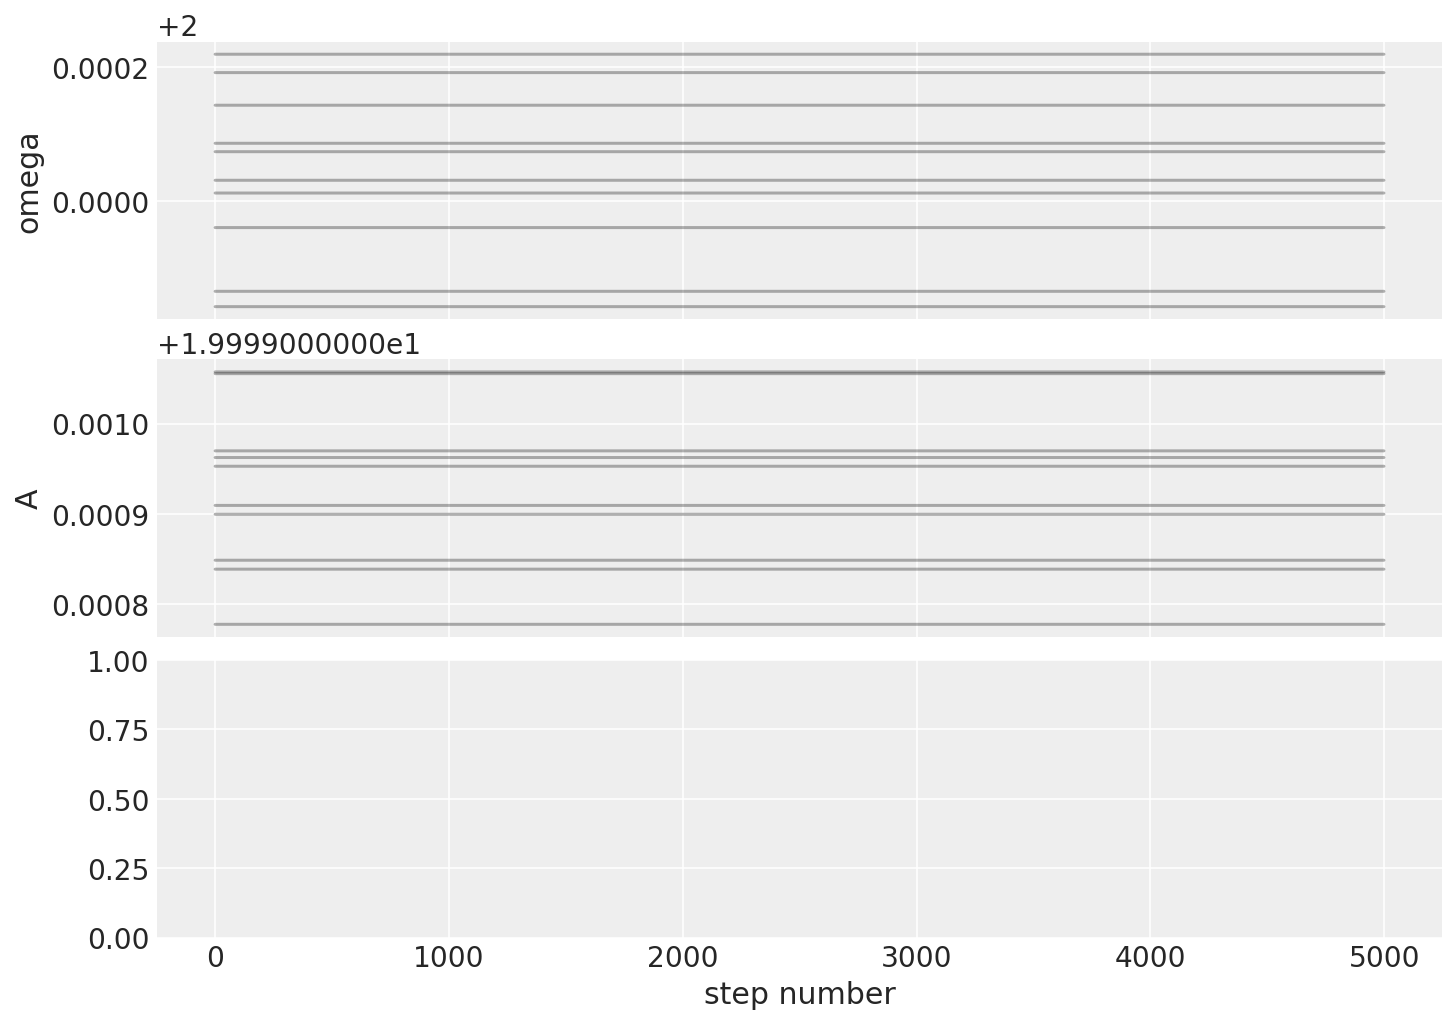

In [144]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["omega", "A", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

C:\Users\ajati\anaconda3\lib\site-packages\corner\core.py:103: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(


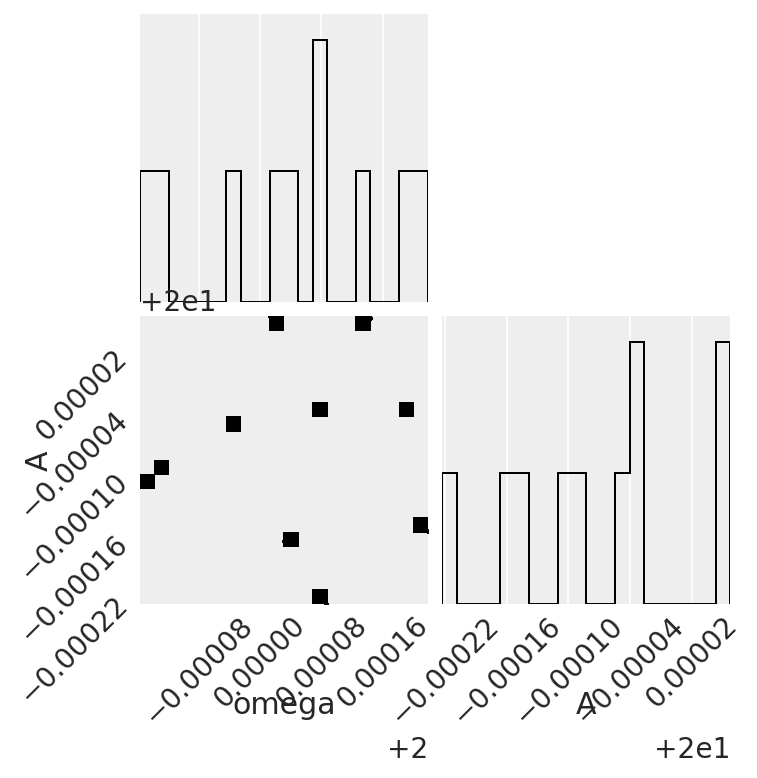

In [145]:
import corner

flat_samples = sampler.get_chain(discard=10, thin=15, flat=True)
fig = corner.corner(flat_samples, labels=labels, truths=[17, 1.3])